X_train = (576, 8) ,X_test = (192, 8), y_train = (576,), y_test = (192,)
3 0.7083333333333334
4 0.7083333333333334
5 0.7083333333333334
6 0.7083333333333334
7 0.7083333333333334
8 0.7083333333333334
9 0.7083333333333334
10 0.7083333333333334
11 0.7083333333333334
12 0.7083333333333334
13 0.7083333333333334
14 0.7083333333333334
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    2.0s finished


0.7552083333333334

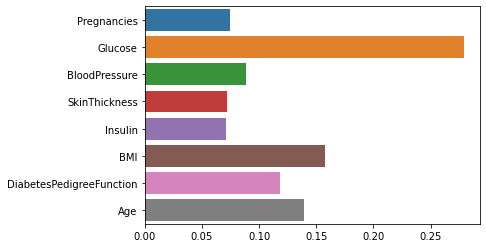

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("diabetes.csv")
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X, y = df.drop("Outcome", axis = 1), df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle = True, random_state =42)
print("X_train = {} ,X_test = {}, y_train = {}, y_test = {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

for depth in range(3,15):
    model = DecisionTreeClassifier(max_depth = 13, random_state= 42).fit(X_train, y_train)
    print(depth, model.score(X_test,y_test))
# K-fold가 가능하다.

from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state = 42)

# 무슨 의미일까?
param_grid = {"max_depth": range(3,12),
              "max_features": [0.3, 0.5, 0.7, 0.9, 1]}

# n_jobs는 프로세서(cpu) ,cv = 5(k-fold에서 K개 의미)
clf = GridSearchCV(model, param_grid = param_grid, n_jobs = -1, cv = 5, verbose=2)
clf.fit(X_train, y_train)



from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state= 42, n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)
sns.barplot(model.feature_importances_, X_train.columns.tolist())
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100, max_depth = 1,random_state= 42)

model.fit(X_train, y_train)
model.score(X_test, y_test)

# 정리

1) K-fold validation을 이용해서, 모델의 최적화된 파라미터를 찾기

- GridSearchCV를 이용해서, K-fold cross validation 활용가능하다.
- 이때 최고의 성능을 보인 train (best param)을 찾을 수 있다.

2) 다양한 트리계열 머신러닝
- Decision Tree
- random forest --> bagging(BootStrap aggregating) 방법이라고도 불린다.
- GradientBoosting --> 부스팅이라고 불림